In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)

2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
readability_task = ReadabilityTask(processor,
                                   "./allusion_corpus",
                                   poem_seq_len)
task_list.append(readability_task)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()

I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-03-12_17_56/0/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
21/21 [==============================] - 137s 7s/step - task_name: READABILITY - loss: 0.8290 - accuracy: 0.5900 - val_loss: 0.8393 - val_accuracy: 0.6328


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
21/21 [==============================] - 79s 4s/step - task_name: READABILITY - loss: 0.6655 - accuracy: 0.7091 - val_loss: 0.7778 - val_accuracy: 0.6602


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
21/21 [==============================] - 21s 996ms/step - task_name: READABILITY - loss: 0.6033 - accuracy: 0.7232 - val_loss: 0.7507 - val_accuracy: 0.6641


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
21/21 [==============================] - 5s 228ms/step - task_name: READABILITY - loss: 0.5449 - accuracy: 0.7641 - val_loss: 0.7544 - val_accuracy: 0.6367


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
21/21 [==============================] - 4s 208ms/step - task_name: READABILITY - loss: 0.5099 - accuracy: 0.7798 - val_loss: 0.7523 - val_accuracy: 0.6523


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
21/21 [==============================] - 4s 208ms/step - task_name: READABILITY - loss: 0.4474 - accuracy: 0.8207 - val_loss: 0.8253 - val_accuracy: 0.6445


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
21/21 [==============================] - 4s 211ms/step - task_name: READABILITY - loss: 0.4057 - accuracy: 0.8378 - val_loss: 0.8713 - val_accuracy: 0.6523


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
21/21 [==============================] - 5s 235ms/step - task_name: READABILITY - loss: 0.3312 - accuracy: 0.8824 - val_loss: 1.0446 - val_accuracy: 0.5977


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
21/21 [==============================] - 5s 236ms/step - task_name: READABILITY - loss: 0.2921 - accuracy: 0.8929 - val_loss: 1.1725 - val_accuracy: 0.5977


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
21/21 [==============================] - 6s 295ms/step - task_name: READABILITY - loss: 0.2586 - accuracy: 0.9062 - val_loss: 1.4444 - val_accuracy: 0.5859


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------READABILITY CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.6997       383
   macro avg     0.7408    0.6754    0.6986       383
weighted avg     0.7108    0.6997    0.7001       383


epoch:classification EPOCH accuracy: 0.6997389033942559 precision: 0.740803, recall: 0.675407, f1: 0.698605

-----------------------------READABILITY END ----------------------------
train_example:**************************************************
x_seq:金 谷 年 年 ， 乱 生 春 色 谁 为 主 ？ 余 花 落 处 ， 满 地 和 烟 雨 。 又 是 离 歌 ，
y_pred:2
y_true:2
----------
x_seq:中 庭 淡 月 照 三 更 ， 白 露 洗 空 河 汉 明 。 莫 遣 西 风 吹 叶 尽 ， 却 愁 无 处 着
y_pred:1
y_true:1
----------
x_seq:碧 空 溶 溶 月 华 静 ， 月 里 愁 人 吊 孤 影 。 花 开 残 菊 傍 疏 篱 ， 叶 下 衰 桐 落
y_pred:1
y_true:1
----------
x_seq:昔 年 戎 虏 犯 榆 关 ， 一 败 龙 城 匹 马 还 。 侯 印 不 闻 封 李 广 ， 他 人 丘 垄 似
y_pred:2
y_true:1
----------
x_seq:江 国 逾 千 里 ， 山 城 仅 百 层 。 岸 风 翻 夕 浪 ， 舟 雪 洒 寒 灯 。 留 滞 才 难 尽


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


test_example:**************************************************
x_seq:鸦 翎 羽 箭 山 桑 弓 ， 仰 天 射 落 衔 芦 鸿 。 麻 衣 黑 肥 冲 北 风 ， 带 酒 日 晚 歌
y_pred:2
y_true:2
----------
x_seq:渴 不 饮 盗 泉 水 ， 热 不 息 恶 木 阴 。 恶 木 岂 无 枝 ？ 志 士 多 苦 心 。 整 驾 肃
y_pred:2
y_true:2
----------
x_seq:楚 女 欲 归 南 浦 ， 朝 雨 。 湿 愁 红 ， 小 船 摇 漾 入 花 里 。 波 起 ， 隔 西 风 。
y_pred:1
y_true:1
----------
x_seq:零 落 残 魂 倍 黯 然 ， 双 垂 别 泪 越 江 边 。 一 身 去 国 六 千 里 ， 万 死 投 荒 十
y_pred:2
y_true:2
----------
x_seq:蓬 头 稚 子 学 垂 纶 ， 侧 坐 莓 苔 草 映 身 。 路 人 借 问 遥 招 手 ， 怕 得 鱼 惊 不
y_pred:1
y_true:1
----------
x_seq:两 种 风 流 ， 一 家 制 作 。 雪 花 全 似 梅 花 萼 。 细 看 不 是 雪 无 香 ， 天 风 吹
y_pred:1
y_true:1
----------
x_seq:前 不 见 古 人 ， 后 不 见 来 者 。 念 天 地 之 悠 悠 ， 独 怆 然 而 涕 下 。 [UNK] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:柴 门 风 卷 却 吹 工 ， [UNK] 径 初 成 竹 旋 栽 。 梢 影 细 从 茶 碗 入 ， 叶 声 轻 逐 篆
y_pred:1
y_true:3
----------
x_seq:古 木 卧 平 沙 ， 摧 残 岁 月 赊 。 有 根 横 水 石 ， 无 叶 拂 烟 霞 。 春 至 苔 为 叶
y_pred:2
y_true:2
----------
x_seq:客 从 东 方 来 ， 衣 上 灞 陵 雨 。 问 客 何 为 来 ， 采 山 因 买 斧 。 冥 冥 花 正 开
y_pred:1
y_true:1
-

I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-03-12_17_56/1/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
21/21 [==============================] - 42s 2s/step - task_name: READABILITY - loss: 0.8772 - accuracy: 0.5699 - val_loss: 0.9659 - val_accuracy: 0.6250


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
21/21 [==============================] - 29s 1s/step - task_name: READABILITY - loss: 0.6939 - accuracy: 0.6845 - val_loss: 0.9157 - val_accuracy: 0.6680


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
21/21 [==============================] - 5s 216ms/step - task_name: READABILITY - loss: 0.6339 - accuracy: 0.7143 - val_loss: 0.9246 - val_accuracy: 0.6367


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
21/21 [==============================] - 4s 203ms/step - task_name: READABILITY - loss: 0.5734 - accuracy: 0.7530 - val_loss: 0.9405 - val_accuracy: 0.6641


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
21/21 [==============================] - 4s 210ms/step - task_name: READABILITY - loss: 0.5132 - accuracy: 0.7753 - val_loss: 0.9688 - val_accuracy: 0.6289


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
21/21 [==============================] - 4s 206ms/step - task_name: READABILITY - loss: 0.4638 - accuracy: 0.8080 - val_loss: 1.0311 - val_accuracy: 0.6328


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
21/21 [==============================] - 4s 210ms/step - task_name: READABILITY - loss: 0.4041 - accuracy: 0.8371 - val_loss: 1.0069 - val_accuracy: 0.6406


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
21/21 [==============================] - 4s 212ms/step - task_name: READABILITY - loss: 0.3494 - accuracy: 0.8616 - val_loss: 1.1650 - val_accuracy: 0.6055


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
21/21 [==============================] - 5s 231ms/step - task_name: READABILITY - loss: 0.3183 - accuracy: 0.8713 - val_loss: 1.3548 - val_accuracy: 0.5977


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------READABILITY CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.6371       383
   macro avg     0.6851    0.6285    0.6499       383
weighted avg     0.6494    0.6371    0.6393       383


epoch:classification EPOCH accuracy: 0.6370757180156658 precision: 0.685135, recall: 0.628534, f1: 0.649880

-----------------------------READABILITY END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:辞 宗 盛 荆 梦 ， 登 歌 美 [UNK] 绎 。 徒 收 杞 梓 饶 ， 曾 非 羽 人 宅 。 罗 景 蔼 云 [UNK]
y_pred:2
y_true:3
----------
x_seq:马 上 凝 情 忆 旧 游 ， 照 花 淹 竹 小 溪 流 。 钿 筝 罗 幕 玉 搔 头 。 早 是 出 门 长
y_pred:1
y_true:1
----------
x_seq:小 院 深 深 门 掩 亚 。 寂 寞 珠 帘 ， 画 阁 重 重 下 。 欲 近 禁 烟 微 雨 罢 ， 绿 杨
y_pred:1
y_true:2
----------
x_seq:上 陵 何 美 美 ， 下 津 风 以 寒 。 问 客 从 何 来 ， 言 从 水 中 央 。 桂 树 为 君 船
y_pred:1
y_true:2
----------
x_seq:为 君 既 不 易 ， 为 臣 良 独 难 。 忠 信 事 不 显 ， 乃 有 见 疑 患 。 周 公 佐 成 王
y_pred:3
y_true:2
----------
x_seq:有 车 邻 邻 ， 有 马 白 颠 。 未 见 君 子 ， 寺 人 之 令 。 阪 有 漆 ， [UNK] 有 栗 。 既
y_pred:3
y_true:3
----------
x_seq:我 行 日 夜 向 江 海 ， 枫 叶 芦 花 秋 兴 长 。 长 淮 忽 迷 天 远 近 ， 青 山 久 与 船
y_pred:2
y_true:2
----------
x_seq:回 乐 峰 前 沙 似 雪 ， 受 降 城 外 月 如 霜 。 ( 回 乐 峰 一 作 ： 回 乐 烽 ） 不 知
y_pred:1
y_true:1
----------
x_seq:阳 关 万 里 道 ， 不 见 一 人 归 。 惟 有 河 边 雁 ， 秋 来 南 向 飞 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:绵 绵 葛 [UNK] ， 在 河 之 浒 。 终 远 兄 弟 ， 谓 他 人 父 。 谓 他 人 父 ， 亦 莫 我 

I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-03-12_17_56/2/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
21/21 [==============================] - 40s 2s/step - task_name: READABILITY - loss: 0.8749 - accuracy: 0.5826 - val_loss: 0.8405 - val_accuracy: 0.6133


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
21/21 [==============================] - 27s 1s/step - task_name: READABILITY - loss: 0.7344 - accuracy: 0.6540 - val_loss: 0.7824 - val_accuracy: 0.6484


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
21/21 [==============================] - 4s 208ms/step - task_name: READABILITY - loss: 0.6789 - accuracy: 0.6987 - val_loss: 0.7876 - val_accuracy: 0.6797


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
21/21 [==============================] - 24s 1s/step - task_name: READABILITY - loss: 0.6365 - accuracy: 0.7128 - val_loss: 0.7547 - val_accuracy: 0.6953


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
21/21 [==============================] - 5s 216ms/step - task_name: READABILITY - loss: 0.5593 - accuracy: 0.7604 - val_loss: 0.8023 - val_accuracy: 0.6523


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
21/21 [==============================] - 4s 207ms/step - task_name: READABILITY - loss: 0.4948 - accuracy: 0.7976 - val_loss: 0.9683 - val_accuracy: 0.6289


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
21/21 [==============================] - 4s 206ms/step - task_name: READABILITY - loss: 0.4702 - accuracy: 0.8162 - val_loss: 0.8832 - val_accuracy: 0.6445


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
21/21 [==============================] - 4s 209ms/step - task_name: READABILITY - loss: 0.3984 - accuracy: 0.8512 - val_loss: 0.8748 - val_accuracy: 0.6719


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
21/21 [==============================] - 5s 216ms/step - task_name: READABILITY - loss: 0.3515 - accuracy: 0.8750 - val_loss: 0.9644 - val_accuracy: 0.6641


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
21/21 [==============================] - 7s 323ms/step - task_name: READABILITY - loss: 0.2989 - accuracy: 0.8943 - val_loss: 0.9565 - val_accuracy: 0.6602


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
21/21 [==============================] - 7s 336ms/step - task_name: READABILITY - loss: 0.2475 - accuracy: 0.9174 - val_loss: 1.0363 - val_accuracy: 0.6758


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------READABILITY CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.6397       383
   macro avg     0.6435    0.6243    0.6283       383
weighted avg     0.6320    0.6397    0.6292       383


epoch:classification EPOCH accuracy: 0.639686684073107 precision: 0.643545, recall: 0.624255, f1: 0.628288

-----------------------------READABILITY END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:莫 唱 当 年 长 恨 歌 ， 人 间 亦 自 有 银 河 。 石 壕 村 里 夫 妻 别 ， 泪 比 长 生 殿
y_pred:1
y_true:1
----------
x_seq:天 街 小 雨 润 如 酥 ， 草 色 遥 看 近 却 无 。 最 是 一 年 春 好 处 ， 绝 胜 烟 柳 满
y_pred:1
y_true:1
----------
x_seq:潜 虬 媚 幽 姿 ， 飞 鸿 响 远 音 。 薄 霄 愧 云 浮 ， 栖 川 [UNK] 渊 沉 。 进 德 智 所 拙
y_pred:2
y_true:2
----------
x_seq:忆 梅 下 西 洲 ， 折 梅 寄 江 北 。 单 衫 杏 子 红 ， 双 鬓 鸦 雏 色 。 西 洲 在 何 处
y_pred:1
y_true:1
----------
x_seq:满 眼 青 山 未 得 过 ， 镜 中 无 那 鬓 丝 何 。 只 言 旋 老 转 无 事 ， 欲 到 中 年 事
y_pred:1
y_true:1
----------
x_seq:界 围 汇 湘 曲 ， 青 壁 环 澄 流 。 悬 泉 粲 成 帘 ， 罗 注 无 时 休 。 韵 磬 叩 凝 碧
y_pred:2
y_true:3
----------
x_seq:常 羡 人 间 琢 玉 郎 ， 天 应 乞 与 点 酥 娘 。 尽 道 清 歌 传 皓 齿 ， 风 起 ， 雪 飞
y_pred:2
y_true:2
----------
x_seq:泛 彼 柏 舟 ， 在 彼 中 河 。 [UNK] 彼 两 髦 ， 实 维 我 仪 。 之 死 矢 靡 它 。 母 也 天
y_pred:3
y_true:3
----------
x_seq:梳 洗 罢 ， 独 倚 望 江 楼 。 过 尽 千 帆 皆 不 是 ， 斜 晖 脉 脉 水 悠 悠 。 肠 断 白
y_pred:1
y_true:1
----------
x_seq:半 堤 花 雨 。 对 芳 辰 消 遣 ， 无 奈 情 绪 。 春 色 尚 堪 描 画 在 ， 万 紫 千 红 尘
y_pred:1
y_true:2
--------

I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-03-12_17_56/3/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1301 samples, validate on 230 samples


Epoch 1/50
21/21 [==============================] - 45s 2s/step - task_name: READABILITY - loss: 0.8489 - accuracy: 0.5930 - val_loss: 0.9517 - val_accuracy: 0.5977


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
21/21 [==============================] - 26s 1s/step - task_name: READABILITY - loss: 0.6895 - accuracy: 0.6823 - val_loss: 0.9200 - val_accuracy: 0.6172


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
21/21 [==============================] - 7s 325ms/step - task_name: READABILITY - loss: 0.7655 - accuracy: 0.6272 - val_loss: 1.0426 - val_accuracy: 0.5820


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
21/21 [==============================] - 21s 987ms/step - task_name: READABILITY - loss: 0.6231 - accuracy: 0.7232 - val_loss: 0.9065 - val_accuracy: 0.6172


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
21/21 [==============================] - 7s 354ms/step - task_name: READABILITY - loss: 0.5697 - accuracy: 0.7470 - val_loss: 0.9306 - val_accuracy: 0.6445


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
21/21 [==============================] - 7s 344ms/step - task_name: READABILITY - loss: 0.5388 - accuracy: 0.7738 - val_loss: 0.9192 - val_accuracy: 0.6445


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
21/21 [==============================] - 7s 335ms/step - task_name: READABILITY - loss: 0.4727 - accuracy: 0.7954 - val_loss: 0.9186 - val_accuracy: 0.6289


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
21/21 [==============================] - 7s 352ms/step - task_name: READABILITY - loss: 0.4289 - accuracy: 0.8304 - val_loss: 0.9671 - val_accuracy: 0.6484


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
21/21 [==============================] - 6s 308ms/step - task_name: READABILITY - loss: 0.3925 - accuracy: 0.8333 - val_loss: 1.0447 - val_accuracy: 0.6328


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
21/21 [==============================] - 5s 252ms/step - task_name: READABILITY - loss: 0.3559 - accuracy: 0.8705 - val_loss: 1.1263 - val_accuracy: 0.6289


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
21/21 [==============================] - 6s 281ms/step - task_name: READABILITY - loss: 0.3259 - accuracy: 0.8854 - val_loss: 1.1825 - val_accuracy: 0.6133


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------READABILITY CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.6815       383
   macro avg     0.7289    0.6814    0.6965       383
weighted avg     0.6965    0.6815    0.6799       383


epoch:classification EPOCH accuracy: 0.6814621409921671 precision: 0.728908, recall: 0.681397, f1: 0.696515

-----------------------------READABILITY END ----------------------------


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:月 映 林 塘 静 ， 风 含 笑 语 凉 。 俯 窥 怜 绿 净 ， 小 立 伫 幽 香 。 携 幼 寻 新 [UNK]
y_pred:2
y_true:1
----------
x_seq:帷 飘 白 玉 堂 ， [UNK] 卷 碧 牙 床 。 楚 女 当 时 意 ， 萧 萧 发 彩 凉 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:2
y_true:1
----------
x_seq:今 夕 为 何 夕 ， 他 乡 说 故 乡 。 看 人 儿 女 大 ， 为 客 岁 年 长 。 戎 马 无 休 歇
y_pred:1
y_true:1
----------
x_seq:飒 飒 西 风 满 院 栽 ， 蕊 寒 香 冷 蝶 难 来 。 他 年 我 若 为 青 帝 ， 报 与 桃 花 一
y_pred:2
y_true:2
----------
x_seq:蜀 国 曾 闻 子 规 鸟 ， 宣 城 又 见 杜 鹃 花 。 一 叫 一 回 肠 一 断 ， 三 春 三 月 忆
y_pred:1
y_true:1
----------
x_seq:今 日 竹 林 宴 ， 我 家 贤 侍 郎 。 三 杯 容 小 阮 ， 醉 后 发 清 狂 。 船 上 齐 桡 乐
y_pred:1
y_true:1
----------
x_seq:春 江 潮 水 连 海 平 ， 海 上 明 月 共 潮 生 。 滟 滟 随 波 千 万 里 ， 何 处 春 江 无
y_pred:1
y_true:2
----------
x_seq:卖 炭 翁 ， 伐 薪 烧 炭 南 山 中 。 满 面 尘 灰 烟 火 色 ， 两 鬓 苍 苍 十 指 黑 。 卖
y_pred:2
y_true:2
----------
x_seq:[UNK] 彼 流 水 ， 朝 宗 于 海 。 [UNK] 彼 飞 隼 ， 载 飞 载 止 。 嗟 我 兄 弟 ， 邦 人 诸 友
y_pred:3
y_true:3
----------
x_seq:八 月 秋 高 风 怒 号 ， 卷 我 屋 上 三 重 茅 。 茅 飞 渡 江 洒 江 郊 ， 高 者 挂 [U

I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:126]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:READABILITY's model_dir is ./model_ckpt/2020-02-03-12_17_56/4/READABILITY-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[READABILITY]:train info:Train on 1302 samples, validate on 230 samples


Epoch 1/50
21/21 [==============================] - 51s 2s/step - task_name: READABILITY - loss: 0.8499 - accuracy: 0.5900 - val_loss: 0.8614 - val_accuracy: 0.6641


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
21/21 [==============================] - 14s 687ms/step - task_name: READABILITY - loss: 0.6552 - accuracy: 0.7165 - val_loss: 0.8043 - val_accuracy: 0.6562


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
21/21 [==============================] - 4s 202ms/step - task_name: READABILITY - loss: 0.6056 - accuracy: 0.7351 - val_loss: 0.8455 - val_accuracy: 0.6484


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
21/21 [==============================] - 4s 212ms/step - task_name: READABILITY - loss: 0.5467 - accuracy: 0.7693 - val_loss: 0.8182 - val_accuracy: 0.6445


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
21/21 [==============================] - 7s 310ms/step - task_name: READABILITY - loss: 0.4876 - accuracy: 0.8013 - val_loss: 0.8705 - val_accuracy: 0.6289


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
21/21 [==============================] - 7s 322ms/step - task_name: READABILITY - loss: 0.4548 - accuracy: 0.8185 - val_loss: 0.8673 - val_accuracy: 0.6602


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
21/21 [==============================] - 7s 313ms/step - task_name: READABILITY - loss: 0.3912 - accuracy: 0.8445 - val_loss: 0.9515 - val_accuracy: 0.6484


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
21/21 [==============================] - 7s 314ms/step - task_name: READABILITY - loss: 0.3453 - accuracy: 0.8765 - val_loss: 1.0922 - val_accuracy: 0.6211


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
21/21 [==============================] - 6s 263ms/step - task_name: READABILITY - loss: 0.2911 - accuracy: 0.8951 - val_loss: 1.1620 - val_accuracy: 0.6055


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------READABILITY CLASS METRICS -----------------------------------

              precision    recall  f1-score   support
    accuracy                         0.6623       382
   macro avg     0.7052    0.6521    0.6593       382
weighted avg     0.6785    0.6623    0.6505       382


epoch:classification EPOCH accuracy: 0.662303664921466 precision: 0.705192, recall: 0.652085, f1: 0.659348

-----------------------------READABILITY END ----------------------------
train_example:**************************************************
x_seq:凤 舞 团 团 饼 。 恨 分 破 、 教 孤 令 。 金 渠 体 净 ， 只 轮 慢 碾 ， 玉 尘 光 莹 。
y_pred:2
y_true:3
----------
x_seq:八 月 奔 涛 ， 千 尺 崔 嵬 ， [UNK] 然 欲 惊 。 似 灵 妃 顾 笑 ， 神 鱼 进 舞 ； 冯 夷 击
y_pred:2
y_true:3
----------
x_seq:醉 里 挑 灯 看 剑 ， 梦 回 吹 角 连 营 。 八 百 里 分 麾 下 炙 ， 五 十 弦 翻 塞 外 声
y_pred:2
y_true:2
----------
x_seq:辛 丑 正 月 五 日 ， 天 气 澄 和 ， 风 物 闲 美 ， 与 二 三 邻 曲 ， 同 游 斜 川 。 临
y_pred:1
y_true:3
----------
x_seq:父 耕 原 上 田 ， 子 [UNK] 山 下 荒 。 六 月 禾 未 秀 ， 官 家 已 修 仓 。 [UN

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


test_example:**************************************************
x_seq:枯 藤 老 树 昏 鸦 ， 小 桥 流 水 人 家 ， 古 道 西 风 瘦 马 。 夕 阳 西 下 ， 断 肠 人
y_pred:1
y_true:1
----------
x_seq:兰 陵 美 酒 郁 金 香 ， 玉 碗 盛 来 琥 珀 光 。 但 使 主 人 能 醉 客 ， 不 知 何 处 是
y_pred:1
y_true:1
----------
x_seq:汉 家 三 十 六 将 军 ， 东 方 雷 动 横 阵 云 。 鸡 鸣 函 谷 客 如 雾 ， 貌 同 心 异 不
y_pred:1
y_true:3
----------
x_seq:乙 丑 岁 赴 试 并 州 ， 道 逢 捕 雁 者 云 ： [UNK] 今 旦 获 一 雁 ， 杀 之 矣 。 其 脱 网
y_pred:1
y_true:2
----------
x_seq:越 女 新 妆 出 镜 心 ， 自 知 明 艳 更 沉 吟 。 齐 纨 未 是 人 间 贵 ， 一 曲 菱 歌 敌
y_pred:1
y_true:2
----------
x_seq:阳 关 万 里 道 ， 不 见 一 人 归 。 惟 有 河 边 雁 ， 秋 来 南 向 飞 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:嬴 氏 乱 天 纪 ， 贤 者 避 其 世 。 黄 绮 之 商 山 ， 伊 人 亦 云 逝 。 往 迹 浸 复 湮
y_pred:2
y_true:2
----------
x_seq:把 酒 祝 东 风 ， 且 共 从 容 。 垂 杨 紫 陌 洛 城 东 。 总 是 当 时 携 手 处 ， 游 遍
y_pred:1
y_true:2
----------
x_seq:莺 嘴 啄 花 红 溜 ， 燕 尾 点 波 绿 皱 。 指 冷 玉 笙 寒 ， 吹 彻 小 梅 春 透 。 依 旧
y_pred:1
y_true:1
----------
x_seq:羔 裘 逍 遥 ， 狐 裘 以 朝 。 岂 不 尔 思 ？ 劳 心 [UNK] [UNK] 。 羔 裘 翱 翔 ， 狐 裘 在 堂
y_p

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

READABILITY	[0.66405342 0.70071647 0.65233552 0.66652712]


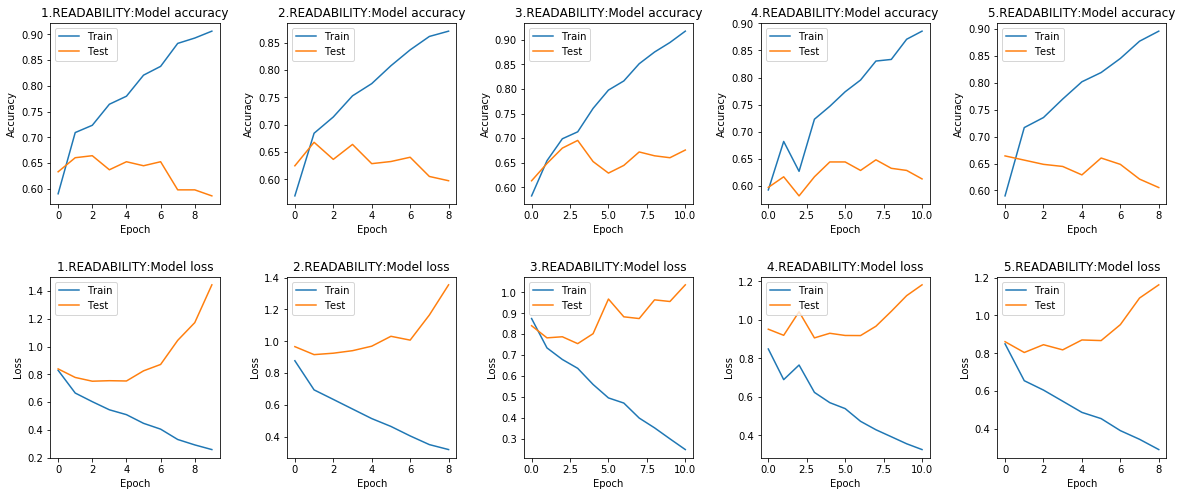

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)